In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.1 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 213 kB 47.9 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 272 kB 48.3 MB/s 
     |████████████████████████████████| 2.3 MB 39.3 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 106 kB 62.3 MB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 593 kB 42.5 MB/s 
     |████████████████████████████████| 856 kB 59

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_dir='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/train'
test_dir='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/test'

img_height,img_width=180,180
batch_size = 64
epochs = 5
num_classes = 23



In [ ]:
training = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18045 files belonging to 23 classes.


In [ ]:
testing = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 23 classes.


In [ ]:
class_names = training.class_names
print(class_names)

['Corn_(maize)___healthy', 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot', 'Corn___Common_Rust', 'Corn___Leaf_Blight', 'Cotton__bacterial_blight', 'Cotton__curl_virus', 'Cotton__fussarium_wilt', 'Cotton__healthy', 'Rice__Bacterial leaf blight', 'Rice__Brown spot', 'Rice__Leaf smut', 'Rice___Healthy', 'Rice___Hispa', 'Rice___Leaf_Blast', 'Sugarcane__Bacterial Blight', 'Sugarcane__Healthy', 'Sugarcane__RedRot', 'Sugarcane__RedRust', 'Wheat__Healthy', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust', 'Wheat__septoria', 'Wheat__stripe_rust']


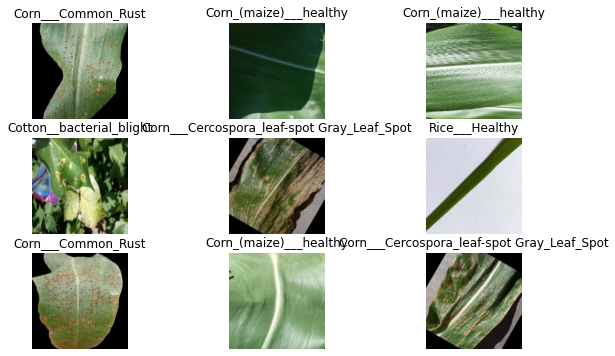

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(training, validation_data=testing, epochs=epochs)

Epoch 1/5
282/282 [==============================] - 693s 2s/step - loss: 0.2056 - accuracy: 0.9249 - val_loss: 0.3474 - val_accuracy: 0.8826
Epoch 2/5
282/282 [==============================] - 691s 2s/step - loss: 0.1792 - accuracy: 0.9321 - val_loss: 0.3820 - val_accuracy: 0.8773
Epoch 3/5
282/282 [==============================] - 697s 2s/step - loss: 0.1391 - accuracy: 0.9483 - val_loss: 0.4502 - val_accuracy: 0.8661
Epoch 4/5
282/282 [==============================] - 673s 2s/step - loss: 0.1231 - accuracy: 0.9540 - val_loss: 0.3764 - val_accuracy: 0.8823
Epoch 5/5
282/282 [==============================] - 640s 2s/step - loss: 0.1162 - accuracy: 0.9563 - val_loss: 0.4365 - val_accuracy: 0.8757


In [ ]:
model

In [ ]:
from tensorflow.keras.models import Model
model.save('/content/drive/MyDrive/topFiveCropDiseasesModelNoorV2.h5')   # Saving model


**load saved model**

In [ ]:
from keras.models import  load_model
model = load_model('/content/drive/MyDrive/topFiveCropDiseasesModelNoor.h5')

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_3d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(23)}

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=9)



app = gr.Interface(fn=predict_image, inputs=image, outputs=label)

app.launch(share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://3902071e304e7487.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1dd0ec5d50>,
 'http://127.0.0.1:7860/',
 'https://3902071e304e7487.gradio.app')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, load_model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

In [ ]:

from skimage import io
import tensorflow.keras.preprocessing.image as image1
from keras.preprocessing import image
import numpy as np
from keras.utils import image
path='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-crops/Wheat__stripe_rust/lolr(91).JPG'
img=image1.load_img(path, grayscale=False, target_size=(180, 180)
show_img=image1.load_img(path, grayscale=False, target_size=(200, 200))
disease_class = ['Cotton__bacterial_blight',
 'Corn_(maize)___healthy',
 'Cotton__curl_virus',
 'Cotton__fussarium_wilt',
 'Cotton__healthy',
 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot',
 'Rice___Healthy',
 'Rice___Hispa',
 'Sugarcane__RedRust',
 'Sugarcane__Bacterial Blight',
 'Rice___Leaf_Blast',
 'Rice__Bacterial leaf blight',
 'Corn___Common_Rust',
 'Sugarcane__Healthy',
 'Rice__Brown spot',
 'Rice__Leaf smut',
 'Sugarcane__RedRot',
 'Corn___Leaf_Blight',
 'Wheat___Brown_Rust',
 'Wheat___Yellow_Rust',
 'Wheat__Healthy',
 'Wheat__septoria',
 'Wheat__stripe_rust']
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
#x = np.array(x, 'float32')
x /= 255




custom = model.predict(x)


# custom = model.predict(x)
# print(custom[0])



#x = x.reshape([64, 64]);

#plt.gray()
plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',disease_class[ind])

SyntaxError: ignored